### **INTERPRETABLE SELF ORGANIZING MAP (iSOM) ASSISTED INTERACTIVE MULTI-CRITERIA DECISION-MAKING FOLLOWING PARETO RACE**
#### **FIGURE 1 DETAILS: START POINT, REFERENCE POINTS, REFERENCE DIRECTIONS AND PREFERRED SOLUTIONS.**

### **Importing Pre-requisites**

In [1]:
! pip install --pre -U pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210080 sha256=d417fc0ccca5d633b6a2d3ef7da1be2084431bcd32f20d6eb6111f96f247f2e3
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


### **Importing Libraries**




In [2]:
import numpy as np
import math as ma
import scipy
import random
from pymoo.indicators.hv import HV
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.rnsga2 import RNSGA2
from pymoo.algorithms.moo.rnsga3 import RNSGA3
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.algorithms.moo.rvea import RVEA
from pymoo.algorithms.moo.ctaea import CTAEA
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.core.problem import ElementwiseProblem
from pymoo.factory import get_problem, get_reference_directions
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from scipy.stats import qmc
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from sklearn import preprocessing
from matplotlib.patches import Polygon

from pymoo.constraints.from_bounds import ConstraintsFromBounds
from pymoo.gradient.automatic import AutomaticDifferentiation
from pymoo.problems import get_problem
from pymoo.indicators.kktpm import KKTPM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from sklearn.metrics.pairwise import euclidean_distances

## **DTLZ-2 Pareto Front**

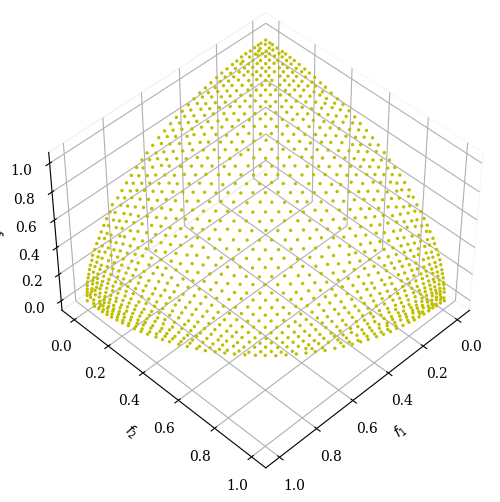

In [3]:
from pymoo.algorithms.moo.nsga3 import NSGA3


from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

# create the reference directions to be used for the optimization
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=50)

# create the algorithm object
algorithm = NSGA3(pop_size=1326,
                  ref_dirs=ref_dirs)

# execute the optimization
res = minimize(get_problem("dtlz2"),
               algorithm,
               seed=1,
               termination=('n_gen', 100))

Scatter().add(res.F, s=2, facecolors='y', edgecolors='y').show()

#### **Ideal and Nadir Point**

In [4]:
ideal = [0, 0, 0]
nadir = [1, 1, 1]

### **Start point**

In [5]:
r_0 = np.array([0.15, 0.15, 1.25])                           # THIS IS USER DEFINED START POINT

**Pareto Optimal Start Point**

In [6]:
dist_z0 = euclidean_distances(res.F, [r_0])                 # HERE FINDING THE CLOSEST SOLUTION OF USER DEFINED START POINT IN PARETO FRONT/ ASF CAN ALSO BE USED
idx = np.array(dist_z0).argmin()
z_0 = res.F[idx,:]
print('Start PO point is:',np.round(z_0,3))

Start PO point is: [0.123 0.123 0.985]


**Aspiration Level / Reference goal vector and Reference direction**

In [7]:
asp_1 = np.array([1.0, z_0[0], 1.0]) # (CLASSIFICATION- {">","=",">"})
dir1 = asp_1 - z_0                   # REFERENCE DIRECTION

**Reference points**:

*In PR algorithm reference points and corresponding preferred solutions are computed iteratively. Here we are computing it simultaneously for generating Figure 1.*

In [8]:
r_p = np.array([z_0 + 0.1*dir1, z_0 + 0.2*dir1, z_0 + 0.3*dir1, z_0 + 0.4*dir1 ,z_0 + 0.5*dir1])

# ref_point = z + t*ref_dir

# SPEED OPTIONS = ["1","2","3","4","5"]

# SPEED ["5","5","5","5","5"]

# t = ["5","5","5","5","5"]*(min(ideal point - nadir point))/(5*10) = [0.1, 0.1, 0.1, 0.1, 0.1]

# Increement in step size [0.1, 0.1, 0.1, 0.1, 0.1]

# [t1, t2, t3, t4, t5] = [0.1, 0.2, 0.3, 0.4, 0.5]

### **Computing Preferred solutions in reference direction**

In [9]:
#create the algorithm object
algorithm_r = RNSGA3(ref_points=r_p ,
    pop_per_ref_point=1,
    mu=0.01)

# execute the optimization
res_a = minimize(get_problem("dtlz2"),
               algorithm_r,
               seed=1,
               termination=('n_gen', 500))

### **Plotting the Preferred Solutions**

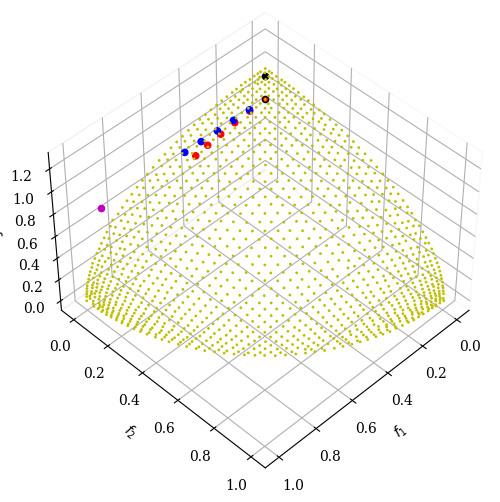

In [10]:
plot = Scatter()
res_a.F = res_a.F[res_a.F[:,0]<0.99]; res_a.F = res_a.F[res_a.F[:,1]<0.99]; res_a.F = res_a.F[res_a.F[:,2]<0.99]         #EXCLUDING EXTREME SOLUTIONS

plot.add(res.F, s=1, facecolors='y', edgecolors='y')                                         # Yellow color points are Pareto Optimal Solutions
plot.add(r_0, s=20, facecolors='k', edgecolors='k')                                          # Black color point is user defined start point
plot.add(asp_1, s=20, facecolors='m', edgecolors='m')                                        # magenta color point is user defined aspiration level
plot.add(z_0, s=20, facecolors='r', edgecolors='k')                                          # Red point with black edge color is Pareto-Optimal point corresponding to user defined start point
plot.add(res_a.F, s=20, facecolors='r', edgecolors='r')                                      # Red color points are MCDM Solutions
plot.add(r_p, s=20, facecolors='b', edgecolors='b')                                          # Blue color points are Referece points
plot.show()

### **Changing the Aspiration Level and Reference direction**

In [11]:
asp_2 = np.array([0, 1, 0])                                                                    #NEW ASPIRATION LEVEL  (Classification- {"<",">","<"})
dir_2 = asp_2 - res_a.F[3,:]                                                                   #NEW REFERENCE DIRECTION

In [12]:
res_a.F

array([[0.20739509, 0.12120305, 0.97088968],
       [0.42871984, 0.1113747 , 0.89661441],
       [0.2870803 , 0.11856473, 0.95070932],
       [0.48975058, 0.10715205, 0.86539796],
       [0.36104388, 0.11513243, 0.92551102]])

**Reference points**:

*In PR algorithm reference points and corresponding preferred solutions are computed iteratively. Here we are computing it simultaneously for generating Figure 1.*

In [13]:
r_p1 = res_a.F[3,:] + np.array([dir_2*0.1, dir_2*0.2, dir_2*0.28, dir_2*0.34, dir_2*0.40, dir_2*0.46])

# ref_point = z + t*ref_dir

# SPEED OPTIONS = ["1","2","3","4","5"]

# SPEED ["5","5","5","3","2"]

# t = ["5","5","5","3","2"]*(min(ideal point - nadir point))/(5*10) = [0.1, 0.1, 0.1, 0.06, 0.04]

# Increement in step size [0.1, 0.1, 0.1, 0.06, 0.04]

# [t1, t2, t3, t4, t5] = [0.1, 0.2, 0.3, 0.36, 0.40]

### **Computing Preferred solutions in reference direction**

In [14]:
# create the algorithm object
algorithm_r = RNSGA3(ref_points=r_p1 ,
    pop_per_ref_point=1,
    mu=0.01)

# execute the optimization
res_b = minimize(get_problem("dtlz2"),
               algorithm_r,
               seed=1,
               termination=('n_gen', 500))

In [15]:
res_b.F

array([[3.37235261e-08, 1.48705107e-07, 1.00016987e+00],
       [1.00017256e+00, 1.15203496e-06, 2.28041410e-06],
       [4.17701599e-01, 5.30534522e-01, 7.37840900e-01],
       [3.54320822e-01, 6.94200382e-01, 6.26792187e-01],
       [3.88702823e-01, 6.14009592e-01, 6.87172676e-01],
       [4.40801085e-01, 4.46448833e-01, 7.78925489e-01],
       [1.43060368e-05, 1.00015793e+00, 2.27069343e-06],
       [4.62710304e-01, 3.38481891e-01, 8.19545262e-01],
       [4.81369149e-01, 2.14009925e-01, 8.50185858e-01]])

## **Plotting Start point, Reference Points, and MCDM Solutions**

Text(0.5, 0.92, 'Refer to Figure 1 in the manuscript')

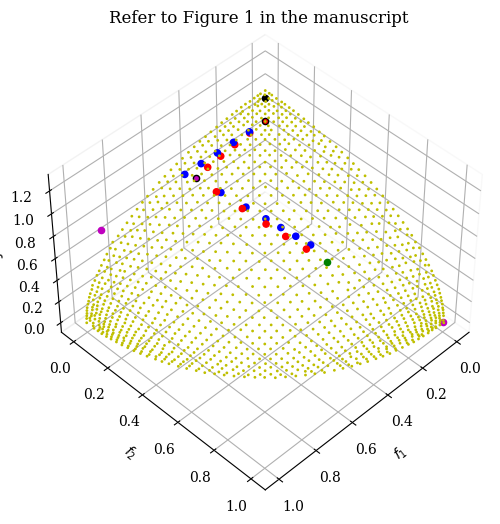

In [25]:
plot = Scatter()
#res_a.F = res_a.F[res_a.F[:,0]<1]; res_a.F = res_a.F[res_a.F[:,1]<0.8]; res_a.F = res_a.F[res_a.F[:,2]<1]      #EXCLUDING EXTREME SOLUTIONS
res_b.F = res_b.F[res_b.F[:,0]>0.01]; res_b.F = res_b.F[res_b.F[:,1]>0.01]; res_b.F = res_b.F[res_b.F[:,2]<1]   #EXCLUDING EXTREME SOLUTIONS

plot.add(res.F, s=1, facecolors='y', edgecolors='y')
plot.add(r_0, s=20, facecolors='k', edgecolors='k')                    # Black color point is user defined start point
plot.add(z_0, s=20, facecolors='r', edgecolors='k')                    # Red point with black edge color is Pareto-Optimal point corresponding to user defined start point
plot.add(asp_1, s=20, facecolors='m', edgecolors='m')                  # Magenta color point is user defined aspiration level
plot.add(res_a.F[[0,1,2,4],:], s=20, facecolors='r', edgecolors='r')   # Red color points are MCDM Solutions
plot.add(res_a.F[3,:], s=20, facecolors='m', edgecolors='k')           # Magenta point with black edge color points represents change in reference direction/TURN
plot.add(asp_2, s=20, facecolors='m', edgecolors='m')                  # Magenta color point is user defined aspiration level
plot.add(res_b.F[[0,2,3,4,5],:], s=20, facecolors='r', edgecolors='r') # Red color points are MCDM Solutions
plot.add(r_p, s=20, facecolors='b', edgecolors='b')                    # Blue color points are Referece points
plot.add(r_p1, s=20, facecolors='b', edgecolors='b')                   # Blue color points are Referece points
plot.add(res_b.F[1,:], s=20, facecolors='g', edgecolors='g')           # Green color point is Final Solution
plot.show()
plt.title('Refer to Figure 1 in the manuscript')

## **REFERENCE POINTS**

In [18]:
print('Reference Points in First Reference Direction:\n',np.round(r_p,3))
print('Reference Points in Second Reference Direction:\n',np.round(r_p1,3))

Reference Points in First Reference Direction:
 [[0.211 0.123 0.987]
 [0.298 0.123 0.988]
 [0.386 0.123 0.99 ]
 [0.474 0.123 0.991]
 [0.561 0.123 0.993]]
Reference Points in Second Reference Direction:
 [[0.441 0.196 0.779]
 [0.392 0.286 0.692]
 [0.353 0.357 0.623]
 [0.323 0.411 0.571]
 [0.294 0.464 0.519]
 [0.264 0.518 0.467]]


## **PREFERRED MCDM SOLUTIONS**

In [19]:
print('MCDM Solutions in First Reference Direction:\n',np.round(res_a.F,3))
print('MCDM Solutions in Second Reference Direction:\n',np.round(res_b.F,3))

MCDM Solutions in First Reference Direction:
 [[0.207 0.121 0.971]
 [0.429 0.111 0.897]
 [0.287 0.119 0.951]
 [0.49  0.107 0.865]
 [0.361 0.115 0.926]]
MCDM Solutions in Second Reference Direction:
 [[0.418 0.531 0.738]
 [0.354 0.694 0.627]
 [0.389 0.614 0.687]
 [0.441 0.446 0.779]
 [0.463 0.338 0.82 ]
 [0.481 0.214 0.85 ]]


----